# The NLP Pipeline

![NLP Pipeline](https://images.prismic.io/turing/65980b21531ac2845a272614_Natural_language_processing_pipeline_e3608ff95c.webp?auto=format,compress)

## 1. Sentence Segmentation 💬

This initial step involves **breaking down raw text into individual sentences**. It's crucial because many subsequent NLP tasks operate at the sentence level. We'll use a library like **NLTK's `punkt` tokenizer**, which is trained to recognize sentence boundaries.

* **Colab Demo:**
    * **Input:** A multi-sentence paragraph.
    * **Code:** `from nltk.tokenize import sent_tokenize; text = "Your sample paragraph here."; sentences = sent_tokenize(text)`
    * **Output:** A list where each element is a separate sentence.

## 2. Word Tokenization 🏷️

After segmentation, we further break down each sentence into **individual words or "tokens."** Punctuation is often treated as separate tokens. This process creates the fundamental units of text that NLP models will analyze. We'll again use an NLTK tokenizer for this.

* **Colab Demo:**
    * **Input:** A single sentence (from the previous step's output).
    * **Code:** `from nltk.tokenize import word_tokenize; sentence = "Your sample sentence here."; words = word_tokenize(sentence)`
    * **Output:** A list of individual words and punctuation marks.

## 3. Stemming 🌳

Stemming is a basic technique to **reduce words to their root or "stem" form** by chopping off suffixes. The resulting stem might not be a linguistically valid word, but it helps group together variations of a word. It's often used for information retrieval. We'll demonstrate with **NLTK's Porter Stemmer**.

* **Colab Demo:**
    * **Input:** A list of words (e.g., "running," "runs," "ran," "runner").
    * **Code:** `from nltk.stem import PorterStemmer; stemmer = PorterStemmer(); stemmed_words = [stemmer.stem(word) for word in words_list]`
    * **Output:** The list of words with their stemmed versions (e.g., "run," "run," "ran," "runner").

## 4. Lemmatization 🍋

Lemmatization is a more sophisticated process that **reduces words to their base or dictionary form (lemma)**. Unlike stemming, the lemma is always a valid word. It uses morphological analysis and often requires knowing the word's part of speech for accuracy. We'll use **NLTK's WordNetLemmatizer**.

* **Colab Demo:**
    * **Input:** A list of words (e.g., "better," "cars," "geese," "ran").
    * **Code:** `from nltk.stem import WordNetLemmatizer; lemmatizer = WordNetLemmatizer(); lemmatized_words = [lemmatizer.lemmatize(word) for word in words_list]`
    * **Output:** The list of words with their lemmatized versions (e.g., "good," "car," "goose," "run").

## 5. Stop Word Analysis 🚫

**Stop words are common words** (like "the," "a," "is," "and") that often carry little significant meaning and can be removed without losing much context. Removing them helps reduce noise and focus on more important terms for analysis. We'll use NLTK's predefined list of English stop words.

* **Colab Demo:**
    * **Input:** A sentence or list of words containing stop words.
    * **Code:** `from nltk.corpus import stopwords; stop_words = set(stopwords.words('english')); filtered_words = [word for word in word_list if word.lower() not in stop_words]`
    * **Output:** The list of words with stop words removed.

## 6. Dependency Parsing 🔗

Dependency parsing analyzes the **grammatical relationships between words in a sentence**. It identifies which words are dependent on others, forming a tree-like structure. This helps us understand the syntactic structure and how words relate to each other's meanings. We'll use **spaCy** for its efficient dependency parser.

* **Colab Demo:**
    * **Input:** A simple sentence.
    * **Code:** `import spacy; nlp = spacy.load("en_core_web_sm"); doc = nlp("The quick brown fox jumps over the lazy dog."); for token in doc: print(f"{token.text} -- {token.dep_} -- {token.head.text}")`
    * **Output:** A table showing each word, its dependency relation, and its head word. You might also display spaCy's built-in dependency visualizer.

## 7. Part-of-Speech Tagging 🏷️

Part-of-Speech (POS) tagging is the process of **assigning a grammatical category to each word** in a sentence. This includes tags like noun (NN), verb (VB), adjective (JJ), adverb (RB), etc. It's a fundamental step that helps subsequent analyses understand the role of each word. We'll use **spaCy** for this.

* **Colab Demo:**
    * **Input:** A sentence.
    * **Code:** `import spacy; nlp = spacy.load("en_core_web_sm"); doc = nlp("The quick brown fox jumps over the lazy dog."); for token in doc: print(f"{token.text} -- {token.pos_}")`
    * **Output:** Each word followed by its assigned POS tag.

---

# Natural Language Processing (NLP) Pipeline & Sentiment Analysis Demo

This Google Colab notebook demonstrates fundamental steps in a Natural Language Processing (NLP) pipeline,
followed by a practical example of sentiment analysis.

We will cover:
1.  **NLP Pipeline Steps:**
    * Sentence Segmentation
    * Word Tokenization
    * Stemming
    * Lemmatization
    * Stop Word Removal
    * Dependency Parsing
    * Part-of-Speech Tagging
2.  **Sentiment Analysis:**
    * Using NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner)

Let's get started!

In [2]:
%%bash
pip install nltk huggingface_hub transformers spacy gensim fastai==2.7.12 fastcore==1.5.29 inltk==0.5.1

# Download necessary NLTK data
python -c "import nltk; nltk.download('punkt'); nltk.download('wordnet'); nltk.download('stopwords'); nltk.download('averaged_perceptron_tagger'); nltk.download('vader_lexicon')"

# Download necessary spaCy model
python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


ERROR: Could not find a version that satisfies the requirement inltk==0.5.1 (from versions: 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.1.0, 0.2.0, 0.3.0, 0.4.0, 0.5.0, 0.6.0, 0.6.1, 0.7, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.8, 0.8.1, 0.9)
ERROR: No matching distribution found for inltk==0.5.1
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## NLP Pipeline Demonstration (English)

In [1]:
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data (already done in setup but good to have here too)
# These lines are typically run once in the setup cell.
# For this standalone snippet, uncomment if running in a fresh environment
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger') # Needed for default POS tagging with NLTK, but we use spaCy here
# nltk.download('vader_lexicon')
# nltk.download('punkt_tab') # This specific download is often not needed if 'punkt' is already there
print("NLTK data resources checked/downloaded...")


# Load spaCy model
try:
    nlp_en = spacy.load("en_core_web_sm")
    print("\nEnglish Core Web spaCy Model Loaded successfully.\n")
except OSError:
    print("SpaCy model 'en_core_web_sm' not found. Downloading...")
    !python -m spacy download en_core_web_sm
    nlp_en = spacy.load("en_core_web_sm")
    print("\nEnglish Core Web spaCy Model Downloaded and Loaded.\n")


text_en = """Natural Language Processing (NLP) is a fascinating and rapidly evolving field at the intersection of computer science, artificial intelligence, and linguistics. At its core, NLP enables computers to understand, interpret, and generate human language in a valuable and meaningful way. It's about bridging the communication gap between humans and machines, allowing us to interact with technology using our most natural form of expression: language.\n
The utility of NLP spans a vast array of applications that touch our daily lives, often without us even realizing it. From the moment you ask a virtual assistant a question, to the automatic translation of a webpage, or even the spam filter protecting your inbox, NLP is hard at work. It's the engine behind search engines that understand your queries, recommendation systems that suggest content, and grammar checkers that refine your writing.\n
One of NLP's crucial applications is in sentiment analysis, where it determines the emotional tone behind a piece of text. Businesses use this to gauge customer feedback from social media, reviews, and surveys, allowing them to understand public perception of their products or services. This insight is invaluable for strategic decision-up making, product development, and customer relationship management.\n
Machine translation is another cornerstone of NLP, breaking down language barriers across the globe. Services like Google Translate utilize sophisticated NLP models to convert text or speech from one language to another, facilitating international communication, trade, and cultural exchange.11 While still imperfect, these systems are constantly improving, striving for more nuanced and contextually accurate translations.\n
The rise of chatbots and virtual assistants is heavily reliant on NLP. These AI-powered entities process user queries, understand their intent, and generate coherent and relevant responses, simulating human-like conversation.14 They are increasingly deployed in customer service, healthcare, and education, providing instant support and information, thereby enhancing user experience and operational efficiency.\n
NLP also plays a pivotal role in information extraction, where it identifies and pulls specific data points from unstructured text. This can involve extracting names, dates, locations, or key facts from legal documents, research papers, or news articles. It transforms vast quantities of raw text into structured, actionable data, significantly reducing the manual effort required for data analysis and knowledge discovery.\n
The importance of NLP cannot be overstated in today's data-driven world. As the volume of digital text data explodes, NLP provides the tools to make sense of this information, transforming it into valuable insights. It empowers organizations to automate tasks, improve decision-making, enhance customer interactions, and uncover hidden patterns in textual data that would otherwise be impossible to analyze at scale.\n
Furthermore, NLP is critical for accessibility and inclusion. By enabling text-to-speech and speech-to-text functionalities, it assists individuals with disabilities in accessing information and communicating more effectively. It also helps bridge linguistic divides, allowing people from different language backgrounds to interact and share knowledge seamlessly.\n
The advancements in NLP are largely driven by breakthroughs in machine learning and deep learning, particularly with the advent of transformer models like BERT, GPT, and others. These models have revolutionized the field, pushing the boundaries of what's possible in language understanding and generation, leading to more accurate translations, more coherent text generation, and more sophisticated conversational AI.\n
In conclusion, NLP is not just a technological innovation; it's a transformative force that is reshaping how humans interact with technology and each other. Its continuous evolution promises to unlock even more sophisticated applications, further integrating intelligent language capabilities into every facet of our digital and real-world experiences, making information more accessible and interactions more intuitive.\n"""

# --- Original Text Display ---
print("\n" + "="*50)
print("  ORIGINAL TEXT")
print("="*50)
print(f"\n{text_en}\n")
print("="*50)


# --- 1. Sentence Segmentation ---
print("\n\n" + "="*50)
print("  1. SENTENCE SEGMENTATION")
print("="*50)
sentences_en = sent_tokenize(text_en)
print("\nDetected Sentences:")
for i, sentence in enumerate(sentences_en):
    print(f"  [{i+1}] {sentence}")
print("-" * 50)


# --- 2. Word Tokenization ---
print("\n\n" + "="*50)
print("  2. WORD TOKENIZATION")
print("="*50)
# Using the first sentence for demonstration
words_en = word_tokenize(sentences_en[0])
print(f"\nSentence for Tokenization: '{sentences_en[0]}'")
print(f"Tokens: {words_en}")
print("-" * 50)


# --- 3. Stemming (using Porter Stemmer) ---
print("\n\n" + "="*50)
print("  3. STEMMING (Porter Stemmer)")
print("="*50)
stemmer = PorterStemmer()
stemmed_words_en = [stemmer.stem(word) for word in words_en]
print(f"\nOriginal Tokens: {words_en}")
print(f"Stemmed Tokens: {stemmed_words_en}")
print("-" * 50)


# --- 4. Lemmatization (using WordNetLemmatizer) ---
print("\n\n" + "="*50)
print("  4. LEMMATIZATION (WordNetLemmatizer)")
print("="*50)
lemmatizer = WordNetLemmatizer()
# Note: Lemmatization often benefits from POS tagging for accuracy
# For a simple demo, we'll just use the default (noun)
lemmatized_words_en = [lemmatizer.lemmatize(word) for word in words_en]
print(f"\nOriginal Tokens: {words_en}")
print(f"Lemmatized Tokens: {lemmatized_words_en}")
print("-" * 50)


# --- 5. Stop Word Analysis ---
print("\n\n" + "="*50)
print("  5. STOP WORD REMOVAL")
print("="*50)
stop_words_en = set(stopwords.words('english'))
filtered_words_en = [word for word in words_en if word.lower() not in stop_words_en]
print(f"\nOriginal Tokens: {words_en}")
print(f"Tokens after Stop Word Removal: {filtered_words_en}")
print("-" * 50)


# --- 6. Dependency Parsing (using spaCy) ---
print("\n\n" + "="*50)
print("  6. DEPENDENCY PARSING (using spaCy)")
print("="*50)
# Corrected: Process the first sentence (a string) with spaCy
doc_en_parsed = nlp_en(sentences_en[0])
print(f"\nSentence for Dependency Parsing: '{sentences_en[0]}'")
print("\n{:<15} {:<20} {:<15} {:<10}".format("Word", "Dependency Relation", "Head Word", "Head POS"))
print("-" * 70) # Adjusted length for better visual separation
for token in doc_en_parsed:
    print(f"{token.text:<15} {token.dep_:<20} {token.head.text:<15} {token.head.pos_:<10}")
print("-" * 70)


# --- 7. Part-of-Speech Tagging (using spaCy) ---
print("\n\n" + "="*50)
print("  7. PART-OF-SPEECH TAGGING (using spaCy)")
print("="*50)
# Using the same doc_en_parsed from the previous step for consistency
print(f"\nSentence for POS Tagging: '{sentences_en[0]}'")
print("\n{:<15} {:<15} {:<25}".format("Word", "POS Tag", "Explanation"))
print("-" * 55)
for token in doc_en_parsed:
    print(f"{token.text:<15} {token.pos_:<15} {spacy.explain(token.pos_):<25}")
print("-" * 55)

print("\n\n" + "="*50)
print("  NLP Pipeline Demo Complete!")
print("="*50)


NLTK data resources checked/downloaded...

English Core Web spaCy Model Loaded successfully.


  ORIGINAL TEXT

Natural Language Processing (NLP) is a fascinating and rapidly evolving field at the intersection of computer science, artificial intelligence, and linguistics. At its core, NLP enables computers to understand, interpret, and generate human language in a valuable and meaningful way. It's about bridging the communication gap between humans and machines, allowing us to interact with technology using our most natural form of expression: language.

The utility of NLP spans a vast array of applications that touch our daily lives, often without us even realizing it. From the moment you ask a virtual assistant a question, to the automatic translation of a webpage, or even the spam filter protecting your inbox, NLP is hard at work. It's the engine behind search engines that understand your queries, recommendation systems that suggest content, and grammar checkers that refine your wri

### Sentiment Analysis Demonstration

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# --- Sentiment Analysis ---
print("="*60) # Increased width for new headers
print("  SENTIMENT ANALYSIS (using NLTK's VADER)")
print("="*60) # Increased width for new headers
analyzer_en = SentimentIntensityAnalyzer()

sentences_for_sentiment_en = [
    "This is a great movie!",
    "I really disliked that experience.",
    "The weather is neutral today.",
    "This product is amazing and I love it!",
    "It was okay, nothing special."
]

# Print table header with full words
print("\n{:<45} {:>10} {:>10} {:>10} {:>12} {:>12}".format(
    "Sentence", "Negative", "Neutral", "Positive", "Compound", "Sentiment"
))
print("-" * 105) # Adjusted length for new headers and wider columns

# Analyze and print each sentence in a table row
for sentence in sentences_for_sentiment_en:
    vs = analyzer_en.polarity_scores(sentence)
    if vs['compound'] >= 0.05:
        sentiment = 'Positive'
    elif vs['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    print("{:<45} {:>10.3f} {:>10.3f} {:>10.3f} {:>12.3f} {:>12}".format( # Adjusted width for numbers
        f"'{sentence}'",
        vs['neg'], vs['neu'], vs['pos'], vs['compound'], sentiment
    ))

print("\n" + "="*60)
print("  NLP Pipeline & Sentiment Analysis Demo Complete!")
print("="*60)

  SENTIMENT ANALYSIS (using NLTK's VADER)

Sentence                                        Negative    Neutral   Positive     Compound    Sentiment
---------------------------------------------------------------------------------------------------------
'This is a great movie!'                           0.000      0.406      0.594        0.659     Positive
'I really disliked that experience.'               0.499      0.501      0.000       -0.458     Negative
'The weather is neutral today.'                    0.000      1.000      0.000        0.000      Neutral
'This product is amazing and I love it!'           0.000      0.376      0.624        0.852     Positive
'It was okay, nothing special.'                    0.315      0.419      0.265       -0.092     Negative

  NLP Pipeline & Sentiment Analysis Demo Complete!


### 😃 What is Sentiment Analysis?

Sentiment analysis, also known as opinion mining, is a Natural Language Processing (NLP) technique used to determine the **emotional tone** of a piece of text. Its goal is to classify the sentiment expressed in text as positive, negative, or neutral. This technology helps computers understand subjective information, making it incredibly useful for:

  * **Understanding customer feedback:** Analyzing reviews, social media comments, and support tickets to gauge satisfaction.
  * **Market research:** Tracking public opinion about products, brands, or political candidates.
  * **Brand monitoring:** Identifying mentions of a brand and understanding the sentiment associated with them.
  * **Customer service:** Prioritizing urgent or negative feedback.


### 🛠️ How Sentiment Analysis Works in our Code (using VADER)

Our code uses **NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner)** for sentiment analysis. VADER is a rule-based sentiment analysis model specifically attuned to sentiments expressed in social media contexts. It doesn't rely on training data (like machine learning models) but instead uses a lexicon (a dictionary of words) and a set of rules.

Here's a breakdown of how it works in oour code:

#### 1\. The VADER Lexicon

VADER comes with a **pre-built lexicon** containing a list of words, each associated with a sentiment score (valence). For example:

  * "good" might have a positive score.
  * "bad" might have a negative score.
  * "amazing" would have a higher positive score than "good."

It also considers:

  * **Punctuation:** Exclamation marks (e.g., "amazing\!\!\!") increase intensity.
  * **Capitalization:** All-caps words (e.g., "AWFUL") increase intensity.
  * **Degree modifiers (Adverbs):** Words like "very" or "not" can alter the sentiment of a subsequent word (e.g., "very good" is stronger than "good"; "not good" flips the sentiment).
  * **Conjunctions:** Words like "but" can shift sentiment focus.

#### 2\. The `SentimentIntensityAnalyzer()`

In oour code:

```python
analyzer_en = SentimentIntensityAnalyzer()
```

This line **initializes the VADER sentiment analyzer**. It loads the VADER lexicon and rules, preparing the `analyzer_en` object to process text.

#### 3\. Analyzing Sentences with `polarity_scores()`

For each sentence in your `sentences_for_sentiment_en` list:

```python
vs = analyzer_en.polarity_scores(sentence)
```

The `polarity_scores()` method takes a sentence as input and returns a dictionary (`vs`) containing four key scores:

  * **`'neg'` (Negative):** The proportion of text that expresses **negative** sentiment.
  * **`'neu'` (Neutral):** The proportion of text that expresses **neutral** sentiment.
  * **`'pos'` (Positive):** The proportion of text that expresses **positive** sentiment.
      * *Note: The sum of `neg`, `neu`, and `pos` for a sentence will approximately add up to 1.0.*
  * **`'compound'` (Compound):** This is the most important score. It's a normalized, weighted composite score ranging from **-1 (most extreme negative)** to **+1 (most extreme positive)**. It's derived by summing the valence scores of each word in the lexicon, adjusting for rules (like intensity boosters or negations), and then normalizing the result.

#### 4\. Interpreting the `compound` Score

Your code then uses the `compound` score to classify the overall sentiment:

```python
if vs['compound'] >= 0.05:
    sentiment = 'Positive'
elif vs['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'
```

This logic applies common thresholds for interpreting the `compound` score:

  * If `compound` is **0.05 or greater**, the sentiment is considered **Positive**.
  * If `compound` is **-0.05 or less**, the sentiment is considered **Negative**.
  * If `compound` is **between -0.05 and 0.05** (exclusive of the bounds), the sentiment is considered **Neutral**.

This simple yet effective rule-based approach makes VADER a popular choice for quick and relatively accurate sentiment analysis, especially for informal text like social media posts.

## NLP Pipeline (Part Two)

In [6]:
# Install required libraries
!pip install nltk spacy transformers sentencepiece --quiet
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import nltk
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

2. NLP Pipeline Steps

  2.1. Sentence Segmentation

In [3]:
from nltk.tokenize import sent_tokenize

text = "Natural Language Processing is fascinating. It enables computers to understand human language!"

sentences = sent_tokenize(text)
print("Sentence Segmentation:", sentences)

Sentence Segmentation: ['Natural Language Processing is fascinating.', 'It enables computers to understand human language!']


2.2. Word Tokenization

In [4]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)
print("Word Tokens:", tokens)

Word Tokens: ['Natural', 'Language', 'Processing', 'is', 'fascinating', '.', 'It', 'enables', 'computers', 'to', 'understand', 'human', 'language', '!']


2.3 Stemming

In [5]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stems = [stemmer.stem(token) for token in tokens]
print("Stems:", stems)

Stems: ['natur', 'languag', 'process', 'is', 'fascin', '.', 'it', 'enabl', 'comput', 'to', 'understand', 'human', 'languag', '!']


2.4 Lemmatization

In [6]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmas:", lemmas)

Lemmas: ['Natural', 'Language', 'Processing', 'is', 'fascinating', '.', 'It', 'enables', 'computer', 'to', 'understand', 'human', 'language', '!']


2.5 Stop Words Removal

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print("Tokens after Stop Word Removal:", filtered_tokens)

Tokens after Stop Word Removal: ['Natural', 'Language', 'Processing', 'fascinating', '.', 'enables', 'computers', 'understand', 'human', 'language', '!']


2.6. Dependency Parsing

In [8]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

print("Dependency Parsing:")
for token in doc:
    print(f"\n{token.text} --> {token.dep_} --> {token.head.text}")

Dependency Parsing:

Natural --> compound --> Language

Language --> compound --> Processing

Processing --> nsubj --> is

is --> ROOT --> is

fascinating --> acomp --> is

. --> punct --> is

It --> nsubj --> enables

enables --> ROOT --> enables

computers --> nsubj --> understand

to --> aux --> understand

understand --> ccomp --> enables

human --> amod --> language

language --> dobj --> understand

! --> punct --> enables


2.7 Parts of Speech Tagging

In [9]:
print("Part-of-Speech Tagging:\n")
for token in doc:
    print(f"{token.text}   -->   {token.pos_}")

Part-of-Speech Tagging:

Natural   -->   PROPN
Language   -->   PROPN
Processing   -->   NOUN
is   -->   AUX
fascinating   -->   ADJ
.   -->   PUNCT
It   -->   PRON
enables   -->   VERB
computers   -->   NOUN
to   -->   PART
understand   -->   VERB
human   -->   ADJ
language   -->   NOUN
!   -->   PUNCT


3. Sentiment Analysis with NLTK's VADER

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print("VADER Sentiment Scores:", sentiment)

VADER Sentiment Scores: {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.7424}


4. Translation using Huggingface Transformers

In [11]:
from transformers import pipeline

# English to French translation
translator_fr = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")
translation = translator_fr(text)
print("\n\nTranslation (EN->FR):", translation[0]['translation_text'])

print("\n\n")

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu




Translation (EN->FR): Le traitement du langage naturel est fascinant. Il permet aux ordinateurs de comprendre le langage humain!





5. Text Generation Model Creation (Word-LSTM Model)

In [7]:
!pip install --upgrade datasets gcsfs fsspec --quiet

In [1]:
# Imports, setting up devices and seed
# !pip install datasets tqdm --quiet

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from datasets import load_dataset
import re
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [22]:
# Load 10% of dataset and tokenize

ds = load_dataset("nirajandhakal/Mahabharata-HHGTTG-Text", split="train[:90%]")
corpus = " ".join(ds['text'])

def tokenize(text):
    # Split on whitespace and punctuation
    return re.findall(r"\b\w+\b|[^\w\s]", text.lower())

tokens = tokenize(corpus)
print(f"Number of tokens: {len(tokens)}")
print("Sample tokens:", tokens[:20])

Number of tokens: 3634450
Sample tokens: ['the', 'epicurean', 'paradox', 'the', 'epicurean', 'paradox', 'is', 'a', 'philosophical', 'argument', 'that', 'has', 'intrigued', 'thinkers', 'for', 'centuries', '.', 'it', 'is', 'an']


In [3]:
# Build vocabulary and Encode
vocab_size = 10000
most_common = Counter(tokens).most_common(vocab_size-2)
vocab = [w for w, _ in most_common]
word2idx = {w: i+2 for i, w in enumerate(vocab)}
word2idx["<PAD>"] = 0
word2idx["<UNK>"] = 1
idx2word = {i: w for w, i in word2idx.items()}

# Encode tokens
encoded = [word2idx.get(w, 1) for w in tokens]  # 1 is <UNK>
print(f"Vocabulary size: {len(word2idx)}")

Vocabulary size: 10000


In [6]:
# Prepare data for training

seq_length = 15  # Longer context for better quality
step = 1         # More overlap, more data, better quality

sequences = []
next_words = []
for i in range(0, len(encoded) - seq_length, step):
    sequences.append(encoded[i:i+seq_length])
    next_words.append(encoded[i+seq_length])

X = np.array(sequences, dtype=np.int32)
y = np.array(next_words, dtype=np.int32)

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Train samples: {len(X_train)}, Val samples: {len(X_val)}")

from torch.utils.data import TensorDataset, DataLoader

batch_size = 256
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.long), torch.tensor(y_val, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

Train samples: 391758, Val samples: 43529


In [7]:
# Define the Model

class WordLSTM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=3, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, vocab_size)
    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out[:, -1, :])
        return out, hidden

embed_size = 256
hidden_size = 512
num_layers = 3
dropout = 0.3

model = WordLSTM(len(word2idx), embed_size, hidden_size, num_layers, dropout).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [8]:
# Train the model and plot the loss

epochs = 10  # Increase for better quality
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def accuracy(preds, targets):
    return (preds.argmax(dim=1) == targets).float().mean().item()

for epoch in range(epochs):
    model.train()
    total_loss, total_acc, total_count = 0, 0, 0
    for xb, yb in tqdm(train_loader, desc=f"Train Epoch {epoch+1}/{epochs}"):
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        output, _ = model(xb)
        loss = loss_fn(output, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
        total_acc += accuracy(output, yb) * xb.size(0)
        total_count += xb.size(0)
    avg_loss = total_loss / total_count
    avg_acc = total_acc / total_count
    train_losses.append(avg_loss)
    train_accuracies.append(avg_acc)

    # Validation
    model.eval()
    val_loss, val_acc, val_count = 0, 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            output, _ = model(xb)
            loss = loss_fn(output, yb)
            val_loss += loss.item() * xb.size(0)
            val_acc += accuracy(output, yb) * xb.size(0)
            val_count += xb.size(0)
    val_losses.append(val_loss / val_count)
    val_accuracies.append(val_acc / val_count)
    print(f"Epoch {epoch+1}: Train Loss={avg_loss:.4f}, Val Loss={val_losses[-1]:.4f}, Train Acc={avg_acc:.4f}, Val Acc={val_accuracies[-1]:.4f}")

Train Epoch 1/10: 100%|██████████| 1531/1531 [01:16<00:00, 20.14it/s]


Epoch 1: Train Loss=6.3144, Val Loss=6.2408, Train Acc=0.0783, Val Acc=0.0786


Train Epoch 2/10: 100%|██████████| 1531/1531 [01:17<00:00, 19.84it/s]


Epoch 2: Train Loss=6.1643, Val Loss=5.7447, Train Acc=0.0869, Val Acc=0.1387


Train Epoch 3/10: 100%|██████████| 1531/1531 [01:17<00:00, 19.65it/s]


Epoch 3: Train Loss=5.2669, Val Loss=4.9505, Train Acc=0.1835, Val Acc=0.2157


Train Epoch 4/10: 100%|██████████| 1531/1531 [01:18<00:00, 19.56it/s]


Epoch 4: Train Loss=4.6935, Val Loss=4.7041, Train Acc=0.2291, Val Acc=0.2411


Train Epoch 5/10: 100%|██████████| 1531/1531 [01:17<00:00, 19.73it/s]


Epoch 5: Train Loss=4.3577, Val Loss=4.5889, Train Acc=0.2505, Val Acc=0.2542


Train Epoch 6/10: 100%|██████████| 1531/1531 [01:17<00:00, 19.68it/s]


Epoch 6: Train Loss=4.1002, Val Loss=4.5632, Train Acc=0.2639, Val Acc=0.2616


Train Epoch 7/10: 100%|██████████| 1531/1531 [01:18<00:00, 19.58it/s]


Epoch 7: Train Loss=3.8865, Val Loss=4.5903, Train Acc=0.2751, Val Acc=0.2651


Train Epoch 8/10: 100%|██████████| 1531/1531 [01:17<00:00, 19.68it/s]


Epoch 8: Train Loss=3.7002, Val Loss=4.6680, Train Acc=0.2864, Val Acc=0.2686


Train Epoch 9/10: 100%|██████████| 1531/1531 [01:17<00:00, 19.75it/s]


Epoch 9: Train Loss=3.5370, Val Loss=4.7425, Train Acc=0.2969, Val Acc=0.2683


Train Epoch 10/10: 100%|██████████| 1531/1531 [01:17<00:00, 19.71it/s]


Epoch 10: Train Loss=3.3925, Val Loss=4.8263, Train Acc=0.3082, Val Acc=0.2688


In [9]:
print(model)

WordLSTM(
  (embedding): Embedding(10000, 256, padding_idx=0)
  (lstm): LSTM(256, 512, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=512, out_features=10000, bias=True)
)


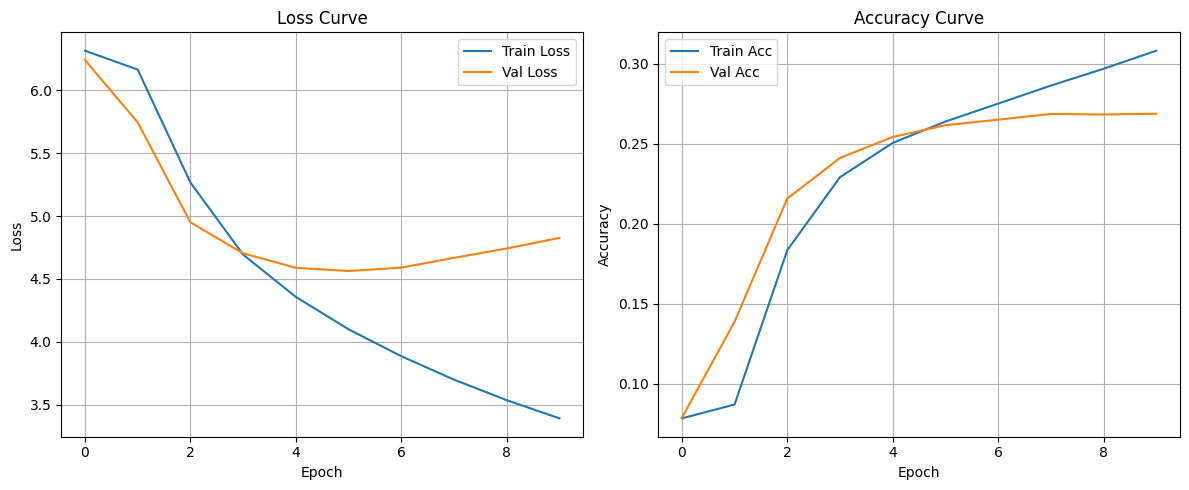

In [10]:
# Plot Training and Validation Curves

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Save the model

save_path = "word_lstm_standard.pth"
torch.save({
    'model_state_dict': model.state_dict(),
    'word2idx': word2idx,
    'idx2word': idx2word,
    'vocab_size': len(word2idx),
    'embed_size': embed_size,
    'hidden_size': hidden_size,
    'num_layers': num_layers,
    'dropout': dropout,
    'seq_length': seq_length
}, save_path)
print(f"Model saved to {save_path}")

Model saved to word_lstm_standard.pth


In [12]:
# Load the Model

def load_model(path):
    checkpoint = torch.load(path, map_location=device)
    model = WordLSTM(
        checkpoint['vocab_size'],
        checkpoint['embed_size'],
        checkpoint['hidden_size'],
        checkpoint['num_layers'],
        checkpoint['dropout']
    ).to(device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    return model, checkpoint['word2idx'], checkpoint['idx2word'], checkpoint['seq_length']

loaded_model, loaded_word2idx, loaded_idx2word, loaded_seq_length = load_model(save_path)
print("Model loaded!")

Model loaded!


In [21]:
# Generate Text

def tokenize(text):
    return re.findall(r"\b\w+\b|[^\w\s]", text.lower())

def generate_text(model, word2idx, idx2word, seq_length, seed, length=40, temperature=1.0):
    model.eval()
    seed_tokens = tokenize(seed.lower())
    seed_encoded = [word2idx.get(w, 1) for w in seed_tokens]
    if len(seed_encoded) < seq_length:
        seed_encoded = [0]*(seq_length-len(seed_encoded)) + seed_encoded
    else:
        seed_encoded = seed_encoded[-seq_length:]
    generated = seed_tokens.copy()
    inp = torch.tensor([seed_encoded], dtype=torch.long, device=device)
    hidden = None
    for _ in range(length):
        out, hidden = model(inp, hidden)
        out = out[0].detach().cpu().numpy()
        out = out / temperature
        exp_out = np.exp(out - np.max(out))
        probs = exp_out / np.sum(exp_out)
        idx = np.random.choice(range(len(idx2word)), p=probs)
        next_word = idx2word.get(idx, "<UNK>")
        generated.append(next_word)
        inp = torch.cat([inp[:, 1:], torch.tensor([[idx]], device=device)], dim=1)
    return " ".join(generated)

seed_text = "The universe is such a place where Krishna is the creator"
print("Generated text (temperature=0.5):\n")
print(generate_text(loaded_model, loaded_word2idx, loaded_idx2word, loaded_seq_length, seed_text, length=100, temperature=0.2))

Generated text (temperature=0.5):

the universe is such a place where krishna is the creator of the universe . it is possible that the gospels is that weâ   t areas of multiple , and that the universe is that the gospels is that the values is the product of the universe . the number of nasaâ is the temperature . the number of slokas composed by the gods and the kaikeyas , the planets , the <UNK> , and the andhakas , the planets , the <UNK> , and the <UNK> , the <UNK> , the <UNK> , and the <UNK> , and the <UNK> , the <UNK> , and the <UNK> ,
